## **Task-2 : Prediction using Unsupervised ML**

## **Problem statement:**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
Data is provided for plotting and analysis.

## **Author: Meetkumar Deshani**

# **Importing All required libraries** 

In [10]:
# Importing all libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Input file URL for reading the data to use**

In [12]:
# Reading data from remote link

sample = pd.read_csv("C:/Users/MAIN/Documents/TSF intern/Iris.csv")
print("Data imported successfully")

Data imported successfully


# **Understating the data and cheking for null values**

In [13]:
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
sample.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
sample.shape

(150, 6)

In [17]:
sample.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
sample.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

By observing data we can say that there is no NULL value present.

# **Dropping the unwanted data and check for duplicate values**

In [21]:
# dropping Id column

sample.drop('Id', axis=1)
sample.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
# check for duplicates rows

print(' Number of duplicate rows: ' , sample.duplicated().sum())  

 Number of duplicate rows:  0


**No Duplicate rows are present so we can move futher.**

**If there was any then we can use drop command to drop that rows**

# **Checking the data**

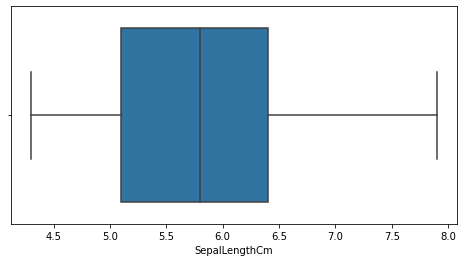

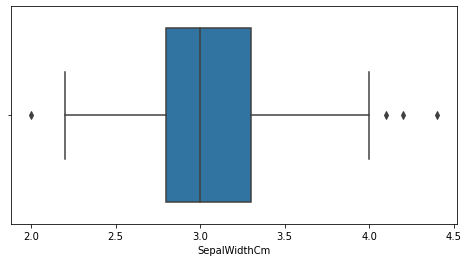

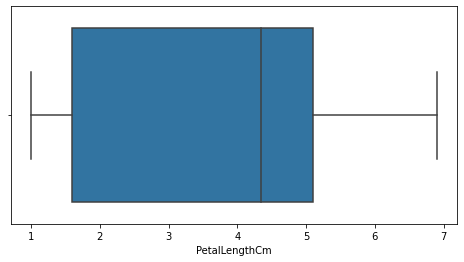

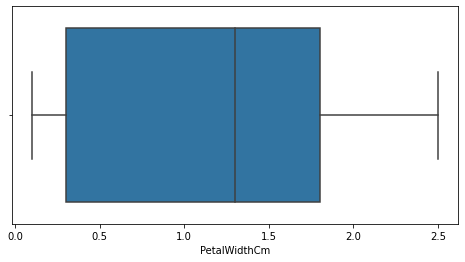

In [26]:
# For any outliers in the numeric data i used for loop so that i don't have to go for each column
# usually for finding outliers we use boxplot 
import warnings
warnings.filterwarnings("ignore")

for i in sample.columns:
    if sample[i].dtype=='float64':
        plt.figure(figsize=(8,4))
        sns.boxplot(sample[i])
        plt.show()

**There are some outliers are present in SepalWidth. so we can drop them otherwise it may create devition in our analysis**

**There are Two Methods for Outlier Treatment**

**Interquartile Range(IQR) Method**

**Z Score method**

**We will use IQR Method for that**

In [30]:
# Treating outliers present in the SepalWidthCm column by IQR

q1=sample['SepalWidthCm'].quantile(0.25)
q3=sample['SepalWidthCm'].quantile(0.75)
iqr = q3-q1
lower_w = q1 - (1.5*iqr)
upper_w = q3 + (1.5*iqr)
sample['SepalWidthCm'] = sample['SepalWidthCm'].apply(lambda x: upper_w if x>upper_w
                                                  else lower_w if x<lower_w else x)
# Here we used Lamda function for that where if value if above upper limit or below lower limit then treated

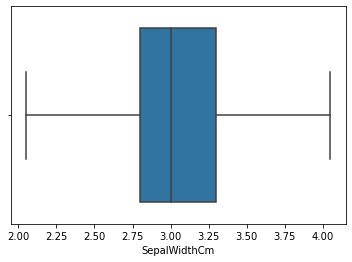

In [31]:
sns.boxplot(sample['SepalWidthCm']);

**There are no outliers present now**

**Finding relation between data columns**

In [32]:
# Correlation b/w them

sample.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397267,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.397267,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.882747,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.355582,0.962757,1.000000


**Patal length and width are much near to each other so it's hard to distinguise based on that**

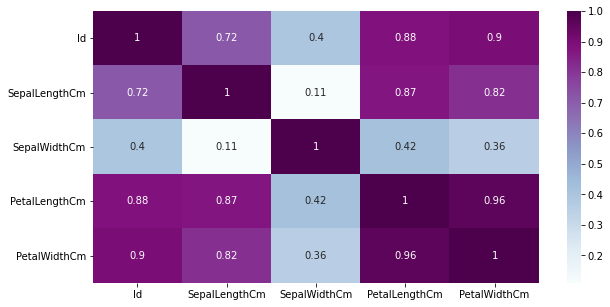

In [38]:
# Heatmap plotting to confirm inferance

plt.figure(figsize=(10,5))
sns.heatmap(abs(sample.corr()), cmap='BuPu', annot=True);

# Clustering: K-Means

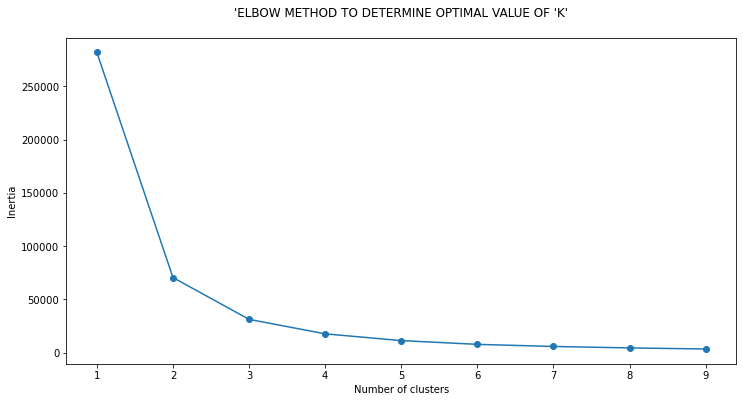

In [39]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(sample.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)
    
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

**According to Elbo method optimual K value is where bend/elbo shape is formed.**

**Here it's 3**


In [41]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(sample.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.407,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.771,   4.26 ]])

In [42]:
sample['cluster'] = kmeans.labels_

sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


**Added label column in the data to see which cluster label is assigned to the data from 3 values**

In [43]:
display(sample['cluster'].value_counts(), sample['Species'].value_counts())

2    50
1    50
0    50
Name: cluster, dtype: int64

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**The values are same so we can say that there is minimal error**

# Visualization of cluster

In [56]:
# Applying kmeans to the dataset
x = sample.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

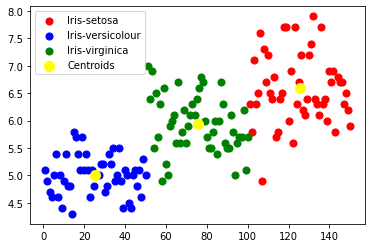

In [61]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s =50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()